### From Linear Regression to Logistic Regression  

Unlike the regression, Logistic regression is use to Classification problem  

** Binary classification with logistic regression **  

Ordinary linear regression assumes that the response variable is normally distributed. 
The normal distribution, also known as the **Gaussian distribution** or **bell curve**, is a 
function that describes the probability that an observation will have a value between 
any two real numbers.   
Normally distributed data is symmetrical. That is, half of the 
values are greater than the mean and the other half of the values are less than the 
mean. The mean, median, and mode of normally distributed data are also equal. Many natural phenomena approximately follow normal distributions.

** The Bernoulli distribution ** 
describes the probability distribution of a random variable that can take the positive 
case with probability P or the negative case with probability 1-P. If the response 
variable represents a probability, it must be constrained to the range {0,1}. 

Linear regression assumes that a constant change in the value of an explanatory variable 
results in a constant change in the value of the response variable, an assumption 
that does not hold if the value of the response variable represents a probability. 
Generalized linear models remove this assumption by relating a linear combination 
of the explanatory variables to the response variable using a link function.

In **logistic regression**, the response variable describes the probability that the outcome 
is the positive case. If the response variable is equal to or exceeds a discrimination 
threshold, the positive class is predicted; otherwise, the negative class is predicted. The 
response variable is modeled as a function of a linear combination of the explanatory 
variables using the logistic function. Given by the following equation, the logistic 
function always returns a value between zero and one:

$$ F(t) = \frac{1}{1+e^{-1}} $$

For logistic regression, t  is equal to a linear combination of explanatory variables,  
as follows:

$$ F(t) = \frac{1}{1+e^{(\beta_0+\beta_x)}}  $$

The logit function is the inverse of the logistic function. It links F(x) back to a linear 
combination of the explanatory variables:

$$ g(x) = ln\frac{F(x)}{1-F(x)} = \beta_0+\beta_x   $$


### Spam and Ham filtering

In [27]:
# import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  confusion_matrix, accuracy_score, recall_score, f1_score, roc_curve, precision_score, auc

%matplotlib inline

In [2]:
# reading sms file
sms = pd.read_csv("data/SMSSpamCollection", delimiter="\t", header=None)
len(sms)

5572

In [3]:
print(sms.head())

      0                                                  1
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
print("No of ham msg : ", sms[sms[0]=='ham'][0].count())
print("No of spam msg : ", sms[sms[0]=='spam'][0].count())

No of ham msg :  4825
No of spam msg :  747


In [5]:
# splitting the data into train n test
X_train_raw, X_test_raw, y_train, y_test = train_test_split(sms[1], sms[0], test_size=0.25)
print(X_train_raw.shape, X_test_raw.shape)

# training the vector
vector = TfidfVectorizer()
# fit and transform the X_train
X_train = vector.fit_transform(X_train_raw)
# transform the X_test
X_test = vector.transform(X_test_raw)
print(X_train.shape, X_test.shape)

# implemeting the classification
classifier = LogisticRegression()
# fitting the data
classifier.fit(X_train, y_train)
# predicting the data
y_pred = classifier.predict(X_test)
print(y_pred.shape)

for i, test in enumerate(X_test_raw[:10]):
    print(y_pred[i]," ",  test)

(4179,) (1393,)
(4179, 7441) (1393, 7441)
(1393,)
ham   Many more happy returns of the day. I wish you happy birthday.
spam   You have 1 new message. Please call 08712400200.
ham   You made my day. Do have a great day too.
ham   My exam is for february 4. Wish you a great day.
ham   Hiya. How was last night? I've been naughty and bought myself clothes and very little ... Ready for more shopping tho! What kind of time do you wanna meet?
ham   Get the door, I'm here
ham   Will you come online today night
ham   Raviyog Peripherals bhayandar east
ham   When should I come over?
ham   Ah, well that confuses things, doesn‘t it?


** Binary classification performance metrics **  

A variety of metrics exist to evaluate the performance of binary classifiers against trusted labels. The most common metrics are **accuracy, precision, recall, F1 measure, and ROC AUC score**. All of these measures depend on the concepts of true positives, 
true negatives, false positives, and false negatives.  

A **confusion matrix, or contingency table**, can be used to 
visualize true and false positives and negatives. The rows of the matrix are the true 
classes of the instances, and the columns are the predicted classes of the instances:

[[1229    0]
 [  29  135]]


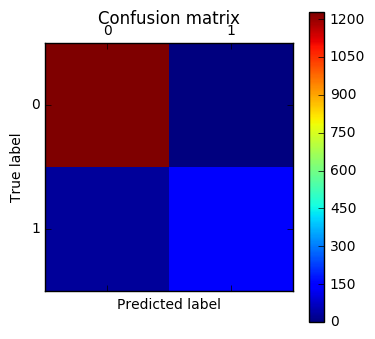

In [6]:
y_test = [0 if i=='ham' else 1 for i in y_test]
y_pred = [0 if i=='ham' else 1 for i in y_pred]

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Accuracy**  
Accuracy measures a fraction of the classifier's predictions that are correct.  

In [10]:
print(accuracy_score(y_test, y_pred))

0.979181622398


Note that your accuracy may differ as the training and test sets are assigned 
randomly. While accuracy measures the overall correctness of the classifier, it 
does not distinguish between false positive errors and false negative errors. Some 
applications may be more sensitive to false negatives than false positives, or vice 
versa. Furthermore, accuracy is not an informative metric if the proportions of 
the classes are skewed in the population.   

For example, a classifier that predicts 
whether or not credit card transactions are fraudulent may be more sensitive to 
false negatives than to false positives. To promote customer satisfaction, the credit 
card company may prefer to risk verifying legitimate transactions than risk ignoring 
a fraudulent transaction. Because most transactions are legitimate, accuracy is 
not an appropriate metric for this problem. A classifier that always predicts that 
transactions are legitimate could have a high accuracy score, but would not be 
useful. For these reasons, classifiers are often evaluated using two additional 
measures called precision and recall.

**Precision and recall**  

$$ P = \frac{TP}{TP+FP} $$

$$ R = \frac{TP}{TP+FN} $$

Individually, precision and recall are seldom informative; they are both incomplete 
views of a classifier's performance. Both precision and recall can fail to distinguish 
classifiers that perform well from certain types of classifiers that perform poorly. A 
trivial classifier could easily achieve a perfect recall score by predicting positive for 
every instance. 

In [15]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

1.0
0.823170731707


** Calculating the F1 measure **  

$$ F1 = 2\frac{PR}{P + R} $$

The F1 measure penalizes classifiers with imbalanced precision and recall scores, 
like the trivial classifier that always predicts the positive class. A model with perfect 
precision and recall scores will achieve an F1 score of one. A model with a perfect 
precision score and a recall score of zero will achieve an F1 score of zero. As for 
precision and recall, scikit-learn provides a function to calculate the F1 score for 
a set of predictions.

In [16]:
print(f1_score(y_test, y_pred))

0.903010033445


** ROC AUC **  

A Receiver Operating Characteristic, or ROC curve, visualizes a classifier's 
performance. Unlike accuracy, the ROC curve is insensitive to data sets with 
unbalanced class proportions; unlike precision and recall, the ROC curve illustrates 
the classifier's performance for all values of the discrimination threshold. ROC 
curves plot the classifier's recall against its fall-out. Fall-out, or the false positive 
rate, is the number of false positives divided by the total number of negatives. It is 
calculated using the following formula:

$$ F = \frac{FP}{TN+FP}  $$

AUC is the area under the ROC curve; it reduces the ROC curve to a single value, 
which represents the expected performance of the classifier. 

[ 0.  1.]


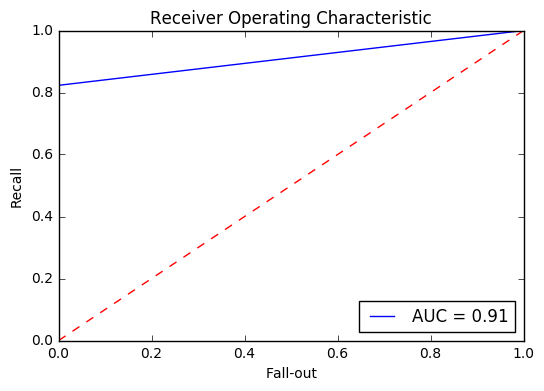

In [25]:
false_positive_rate, recall, thresholds = roc_curve(y_test, y_pred)
print(false_positive_rate)
roc_auc = auc(false_positive_rate, recall)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

From the ROC AUC plot, it is apparent that our classifier outperforms random 
guessing; most of the plot area lies under its curve

### Tuning models with grid search  

Hyperparameters are parameters of the model that are not learned. For example, 
hyperparameters of our logistic regression SMS classifier include the value of 
the regularization term and thresholds used to remove words that appear too 
frequently or infrequently. In scikit-learn, hyperparameters are set through the 
model's constructor. In the previous examples, we did not set any arguments for 
LogisticRegression(); we used the default values for all of the hyperparameters. 
These default values are often a good start, but they may not produce the optimal 
model.

 Grid search is a common method to select the hyperparameter values 
that produce the best model. Grid search takes a set of possible values for each 
hyperparameter that should be tuned, and evaluates a model trained on each 
element of the Cartesian product of the sets. That is, grid search is an exhaustive 
search that trains and evaluates a model for each possible combination of the 
hyperparameter values supplied by the developer. A disadvantage of grid search 
is that it is computationally costly for even small sets of hyperparameter values. 
Fortunately, it is an embarrassingly parallel problem; many models can easily be 
trained and evaluated concurrently since no synchronization is required between 
the processes. Let's use scikit-learn's GridSearchCV() function to find better 
hyperparameter values:

In [30]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression())
])

parameters = {
    'vect__max_df': (0.25, 0.5, 0.75),
    'vect__stop_words': ('english', None),
    'vect__max_features': (2500, 5000, 10000, None),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'vect__use_idf': (True, False),
    'vect__norm': ('l1', 'l2'),
    'clf__penalty': ('l1', 'l2'),
    'clf__C': (0.01, 0.1, 1, 10),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)
grid_search.fit(X_train_raw, y_train)

Fitting 3 folds for each of 1536 candidates, totalling 4608 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 4608 out of 4608 | elapsed: 12.6min finished


"\nprint( 'Best score: %0.3f' % grid_search.best_score_)\nprint( 'Best parameters set:')\nbest_parameters = grid_search.best_estimator_.get_params()\nfor param_name in sorted(parameters.keys()):\n    print( '\t%s: %r' % (param_name, best_parameters[param_name]))\npredictions = grid_search.predict(X_test)\nprint( 'Accuracy:', accuracy_score(y_test, predictions))\nprint( 'Precision:', precision_score(y_test, predictions))\nprint( 'Recall:', recall_score(y_test, predictions))\n"

In [38]:
print( 'Best score: %0.3f' % grid_search.best_score_)
print( 'Best parameters set:')

best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print( '\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(X_test_raw)
predictions = [0 if i == 'ham' else 1 for i in predictions]


print( 'Accuracy:', accuracy_score(y_test, predictions))
print( 'Precision:', precision_score(y_test, predictions))
print( 'Recall:', recall_score(y_test, predictions))

Best score: 0.983
Best parameters set:
	clf__C: 10
	clf__penalty: 'l2'
	vect__max_df: 0.5
	vect__max_features: 5000
	vect__ngram_range: (1, 2)
	vect__norm: 'l2'
	vect__stop_words: None
	vect__use_idf: True
Accuracy: 0.988513998564
Precision: 0.993333333333
Recall: 0.908536585366
